In [1]:
# Import Numpy and Datascience modules
import numpy as np
from datascience import *

# Import plotting tools
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

The following cells read in the data, join them to create a single table, and calculate the metrics that I was curious about

In [2]:
# Read in data
arrests = Table.read_table('police-arrests.csv')
acct = Table.read_table('police-accountability.csv')
demo = Table.read_table('police-demographic.csv')


In [3]:
# Create column for average score across accountability metrics in acct
a = np.zeros(157)

for i in np.arange(3, 9): 
    a = a + 1 - acct.column(i)

for i in np.arange(9, 17):
    a = a + acct.column(i)

acct_score = a/14

acct = acct.with_column('Average Score on 14 Accountability Metrics', acct_score)

In [4]:
# Join tables into a single table
all = arrests.join('Agency Name', acct, 'Agency Name').join('Agency Name', demo, 'Agency Name').drop('Type of Agency_2').drop('Type of Agency_3').drop('County_2').drop('County_3')
all = all.relabeled('White Population', 'Hispanic Population mod').relabeled('Black Population', 'White Population').relabeled('Hispanic Population', 'Black Population').relabeled('Hispanic Population mod', 'Hispanic Population')
all

Agency Name,Type of Agency,County,Region,Overall Score,Police Violence Score,Police Accountability Score,Approach to Policing Score,"People Killed or Seriously Injured by Police, 2016-2018",Percent who Did Not Reportedly Have a Gun,Percent Who were Confirmed Unarmed,People Deadly Force Used Against Who were Perceived to Have a Gun,People Deadly Force Used Against Who were Confirmed with a Gun,2016 Police Shootings,2017 Police Shootings,2018 Police Shootings,"Total Arrests, 2016-2018",Homicides (2013-2018),percent_police_budget,Log of Police Budget,"Asian/Pacific Islander Drug Possession Arrests, 2016","Black Drug Possession Arrests, 2016","Hispanic Drug Possession Arrests, 2016","Unknown Race Drug Possession Arrests, 2016","Other Race Drug Possession Arrests, 2016","White Drug Possession Arrests, 2016",disqualifies_complaints,restricts_delays_interrogations,gives_officers_unfair_access_to_information,limits_oversight_discipline,requires_city_pay_for_misconduct,erases_misconduct_records,requires_deescalation,bans_chokeholds_and_strangleholds,duty_to_intervene,requires_warning_before_shooting,restricts_shooting_at_moving_vehicles,requires_comprehensive_reporting,requires_exhaust_all_other_means_before_shooting,has_use_of_force_continuum,Average Score on 14 Accountability Metrics,Total Population of Jurisdiction,Hispanic Population,White Population,Black Population,Native American Population,Asian Population,Pacific Islander Population,Other Population,Multiracial Population,Percent High School Graduates in Jurisdiction,Unemployment Rate in Jurisdiction,Median Income,Poverty Rate
Alameda County Sheriff's Department,Sheriff's Department,Alameda County,Northern,0.35,0.08,0.63,0.32,28,0.93,0.86,3,2,0,0,0,15573,36,0.12349,8.55954,93,329,628,3,16,956,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0.0714286,179465,46333,63663,16766,0,42283,108,837,9475,86.7,9.6,73775,23.5
Alameda Police Department,Police Department,Alameda County,Northern,0.74,0.72,0.61,0.9,1,1,0,0,0,0,0,0,3581,5,0.12277,7.50417,9,17,25,2,7,49,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0.285714,79654,10066,33238,6078,29,24500,780,562,4401,91.1,4.4,81375,10.2
Alhambra Police Department,Police Department,Los Angeles County,Southern,0.56,0.47,0.43,0.78,2,0.5,0,1,1,1,2,0,3911,10,0.188269,7.3959,11,12,214,1,8,34,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0.357143,86475,32234,9056,1450,136,42012,236,322,1029,82.2,3.5,53247,18.2
Alpine County Sheriff's Department,Sheriff's Department,Alpine County,Northern,0.82,0.75,1,0.71,0,0,0,0,0,0,0,0,37,0,0.17042,6.48772,0,0,0,2,1,4,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0.285714,1203,117,777,18,248,8,0,0,35,91.4,6,61343,44
Amador County Sheriff's Department,Sheriff's Department,Amador County,Northern,0.79,0.85,0.79,0.73,0,0,0,0,0,0,0,0,1476,5,0.188519,7.15304,0,1,6,1,4,39,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0.214286,24089,3565,18141,764,99,463,79,1,977,88.4,15.9,52964,26.5
Anaheim Police Department,Police Department,Orange County,Southern,0.51,0.36,0.39,0.77,16,0.81,0.63,9,3,5,2,4,28200,67,0.117905,8.18503,56,128,1253,1,90,652,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0.214286,354891,189491,91910,6675,181,59712,987,160,5775,77.8,4.5,61877,17.4
Antioch Police Department,Police Department,Contra Costa County,Northern,0.44,0.38,0.4,0.52,8,0.5,0.38,7,4,2,4,1,10115,54,0.329937,7.56885,3,153,65,0,7,169,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0.214286,112630,40000,31792,22257,391,10958,721,85,6426,87.9,6.7,63164,16.3
Bakersfield Police Department,Police Department,Kern County,Central,0.23,0.09,0.26,0.33,67,0.88,0.63,14,8,4,3,2,51337,167,0.175547,7.94071,44,754,1560,1,48,2656,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0.285714,379741,186871,124775,30373,1557,28112,717,291,7045,81,6.4,59925,20.3
Berkeley Police Department,Police Department,Alameda County,Northern,0.52,0.77,0.12,0.67,0,0,0,0,0,0,0,0,7487,12,0.162949,7.80961,12,255,76,4,17,194,1,1,1,1,0,0,0,1,1,1,0,0,0,1,0.428571,122188,14659,69677,6438,548,24403,328,271,5864,96.4,5.5,68969,22.7
Beverly Hills Police Department,Police Department,Los Angeles County,Southern,0.29,0.26,0.46,0.17,2,1,1,0,0,0,

In [5]:
# Create column for people killed/seriously injured normalized by jurisdiction population
all = all.with_column('People Killed or Seriously Injured by Police, 2016-2018 norm by pop.', 
    all.column('People Killed or Seriously Injured by Police, 2016-2018')/all.column('Total Population of Jurisdiction'))

In [6]:
# Create columns for pct white, non-white, pct black, & pct hispanic population
pctwhite = all.column('White Population')/all.column('Total Population of Jurisdiction')
all = all.with_column('White Percent of Population', pctwhite)
pctnonwhite = 1 - all.column('White Population')/all.column('Total Population of Jurisdiction')
all = all.with_column('Pct Non-white', pctnonwhite)
pctblack = all.column('Black Population')/all.column('Total Population of Jurisdiction')
all = all.with_column('Black Percent of Population', pctblack)
pcthispanic = all.column('Hispanic Population')/all.column('Total Population of Jurisdiction')
all = all.with_column('Pct Hispanic', pcthispanic)

# Create columns for pct drug arrests by race
alldrugarrests = all.column(20)+all.column(21)+all.column(22)+all.column(23)+all.column(24)+all.column(25)
all = all.with_column('All Drug Arrests', alldrugarrests)
all = all.with_column('Drug Arrest Rate (Arrests/Person)', alldrugarrests/all.column('Total Population of Jurisdiction'))
all = all.with_column('White Percent of Drug Arrests', all.column('White Drug Possession Arrests, 2016')/alldrugarrests)
all = all.with_column('Non-White Percent of Drug Arrests', 1 - all.column('White Percent of Drug Arrests'))
all = all.with_column('Black Percent of Drug Arrests', all.column('Black Drug Possession Arrests, 2016')/alldrugarrests)
all = all.with_column('Hispanic Percent of Drug Arrests',all.column('Hispanic Drug Possession Arrests, 2016')/alldrugarrests)

The following cells create the graphs presented within the Exploration 1 writeup

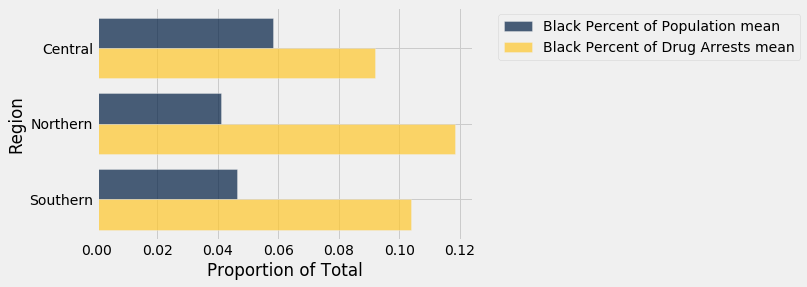

In [7]:
# Create bar chart of proportion of Black people that makes up the population and proportion of 
# Black people that makes up arrests for the three CA regions
all.group('Region', np.mean).barh('Region', select=('Black Percent of Population mean', 'Black Percent of Drug Arrests mean'))
plt.xlabel('Proportion of Total');

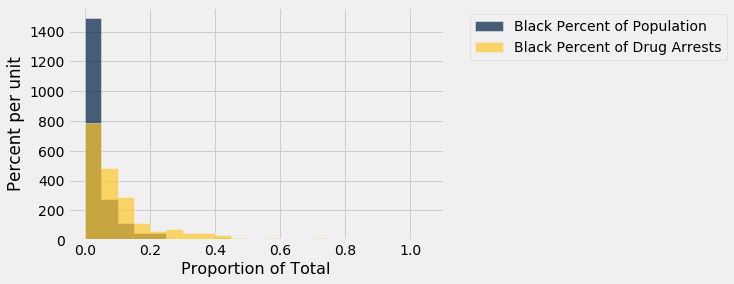

In [8]:
# Create histograms of the proportion of the population in each law enforcement agency jurisdiction made up by 
# Black people and the proportion of drug arrests in each law enforcement agency jurisdiction made up by Black people in California
all.hist('Black Percent of Population', 'Black Percent of Drug Arrests', bins=np.arange(0, 1.1, 0.05))
plt.xlabel('Proportion of Total');

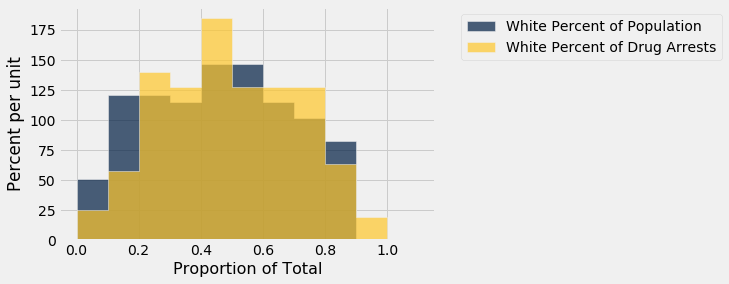

In [9]:
# Create histograms Histograms of the proportion of the population in each law enforcement agency jurisdiction made up by 
# white people and the proportion of drug arrests in each law enforcement agency jurisdiction made up by white people in California
all.hist('White Percent of Population', 'White Percent of Drug Arrests', bins=np.arange(0, 1.2, 0.1))
plt.xlabel('Proportion of Total');

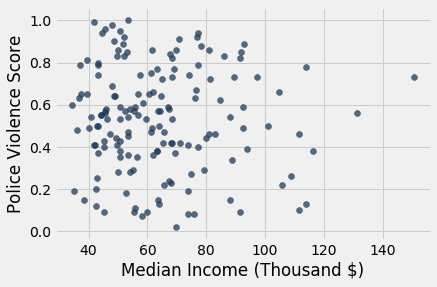

In [10]:
mi = all.column('Median Income')
pvs = all.column('Police Violence Score')

plt.scatter(mi/1000, pvs, color = '#203A59', alpha = 0.75)
plt.xlabel('Median Income (Thousand $)')
plt.ylabel('Police Violence Score');

The following cells show additional graphs and tables that I created when exploring the data that I didn't end up using in the Exploration 1 writeup

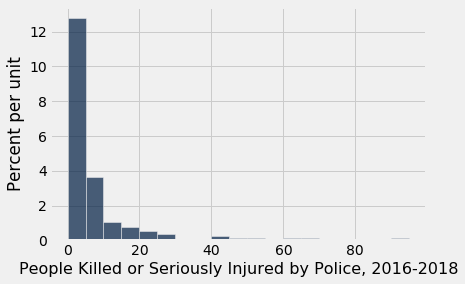

In [11]:
all.hist('People Killed or Seriously Injured by Police, 2016-2018', bins = np.arange(0, 100, 5))

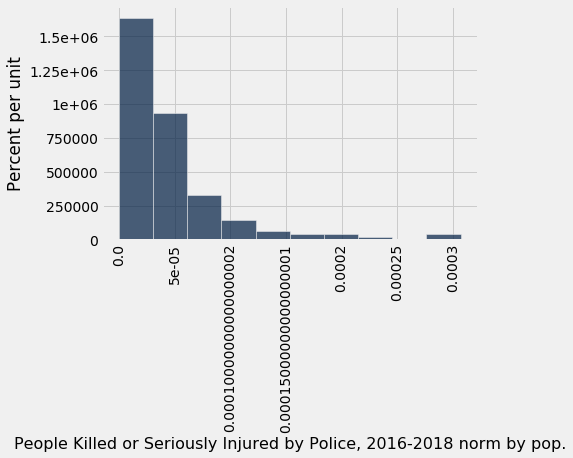

In [12]:
all.hist('People Killed or Seriously Injured by Police, 2016-2018 norm by pop.')

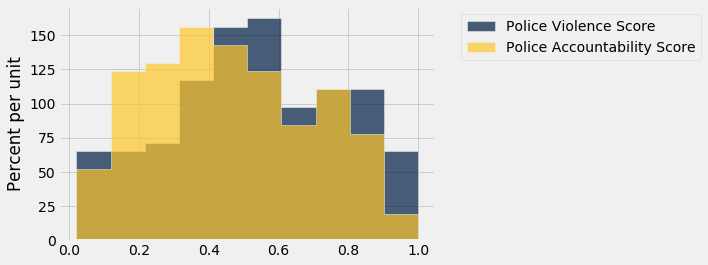

In [13]:
# Table all with columns holding scores for police overall, violence, accountability, & approach to policing
all.select(4, 5, 6, 7).hist(1, 2)

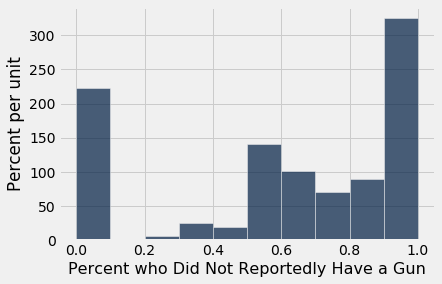

In [14]:
# Table with columns for people killed/seriously injured & whether they were armed/unarmed
all.select(8, 9, 10, 11, 12).hist(1)

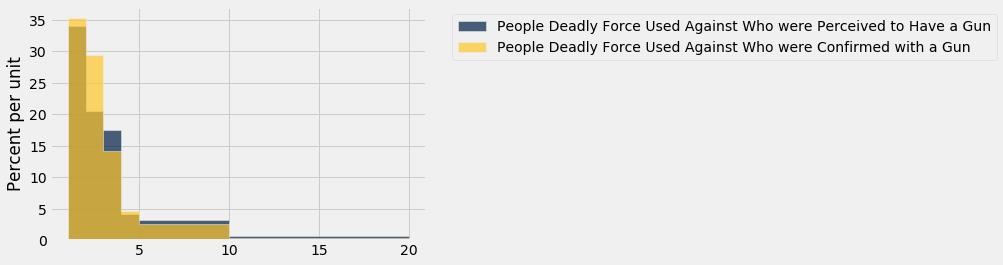

In [15]:
all.select(8, 9, 10, 11, 12).hist(3, 4, bins=(1, 2, 3, 4, 5, 10, 20))

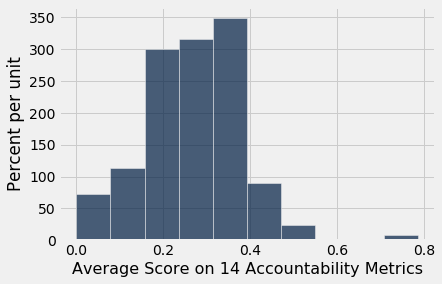

In [16]:
all.hist('Average Score on 14 Accountability Metrics')

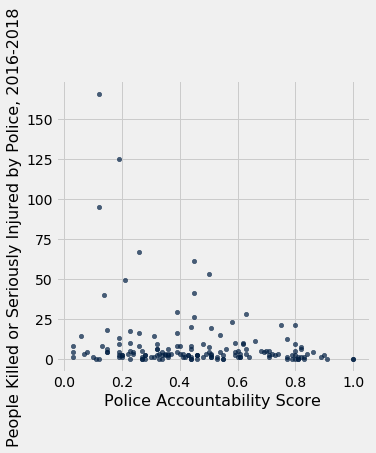

In [17]:
all.scatter('Police Accountability Score', 'People Killed or Seriously Injured by Police, 2016-2018')

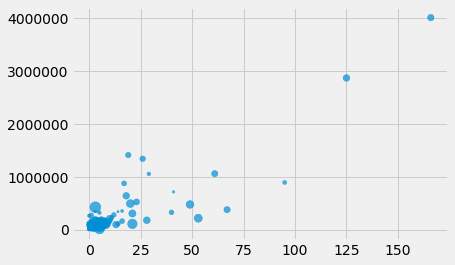

In [18]:
x = all.column('People Killed or Seriously Injured by Police, 2016-2018')
w = all.column('Total Population of Jurisdiction')
mi = all.column('Median Income')/700
r = all.column('Black Percent of Population')*500

plt.plot()
plt.scatter(x, w, s=r, alpha=0.7)

(-1e-05, 0.0003)

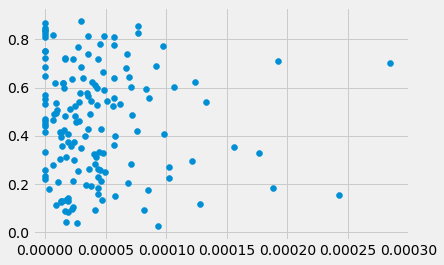

In [19]:
x = all.column('People Killed or Seriously Injured by Police, 2016-2018 norm by pop.')
w = all.column('White Percent of Population')
mi = all.column('Median Income')/700

plt.plot()
plt.scatter(x, w)#, s=mi, alpha=0.7)
plt.xlim(-0.00001, 0.0003)

(-1e-05, 0.0003)

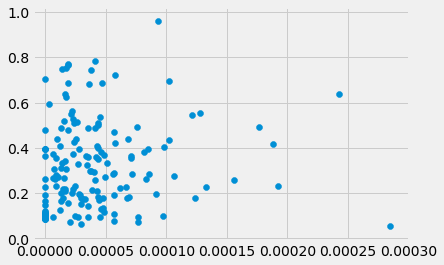

In [20]:
x = all.column('People Killed or Seriously Injured by Police, 2016-2018 norm by pop.')
h = all.column('Pct Hispanic')
mi = all.column('Median Income')/700

plt.plot()
plt.scatter(x, h)#, s=mi, alpha=0.7)
plt.xlim(-0.00001, 0.0003)

(-1e-05, 0.0003)

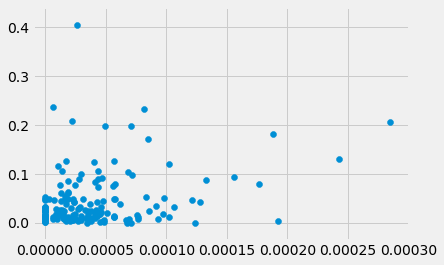

In [21]:
x = all.column('People Killed or Seriously Injured by Police, 2016-2018 norm by pop.')
b = all.column('Black Percent of Population')
mi = all.column('Median Income')/700

plt.plot()
plt.scatter(x, b)#, s=mi, alpha=0.7)
plt.xlim(-0.00001, 0.0003)

(-1e-05, 0.0003)

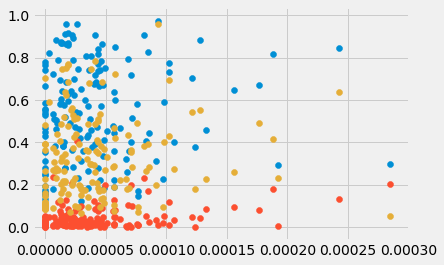

In [22]:
x = all.column('People Killed or Seriously Injured by Police, 2016-2018 norm by pop.')
y = all.column('Pct Non-white')
z = all.column('Black Percent of Population')
q = all.column('Pct Hispanic')
plt.plot()
plt.scatter(x, y)
plt.scatter(x, z)
plt.scatter(x, q)
plt.xlim(-0.00001, 0.0003)

(-1e-05, 0.0003)

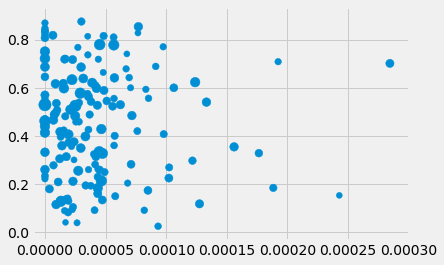

In [23]:
x = all.column('People Killed or Seriously Injured by Police, 2016-2018 norm by pop.')
y = all.column('White Percent of Population')
mi = all.column('Median Income')/1000

plt.scatter(x, y, s = mi)
plt.xlim(-0.00001, 0.0003)

In [24]:
meanmi = np.mean(all.column('Median Income'))
meanmi

64124.828025477706

In [25]:
pvtop5 = all.select(0, 'Median Income', 'Police Violence Score').sort('Police Violence Score', descending = True).take(np.arange(0, 5))
pvtop5mi = np.mean(pvtop5.column('Median Income'))
(pvtop5mi - meanmi)/meanmi

-0.25411729788972504

In [26]:
pvtop10 = all.select(0, 'Median Income', 'Police Violence Score').sort('Police Violence Score', descending = True).take(np.arange(0, 10))
pvtop10mi = np.mean(pvtop10.column('Median Income'))
(pvtop10mi - meanmi)/meanmi

-0.1252187065872118

In [27]:
pvtop20 = all.select(0, 'Median Income', 'Police Violence Score').sort('Police Violence Score', descending = True).take(np.arange(0, 20))
pvtop20mi = np.mean(pvtop20.column('Median Income')) 
(pvtop20mi - meanmi)/meanmi

-0.03396544041587669

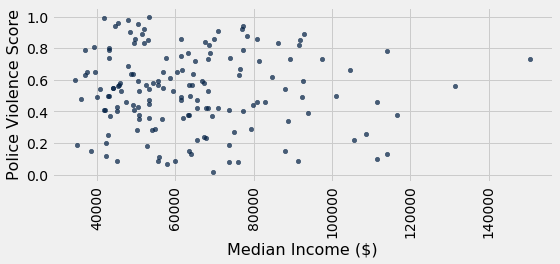

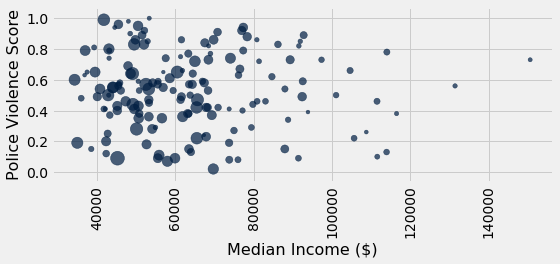

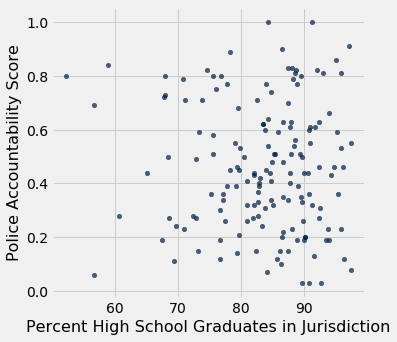

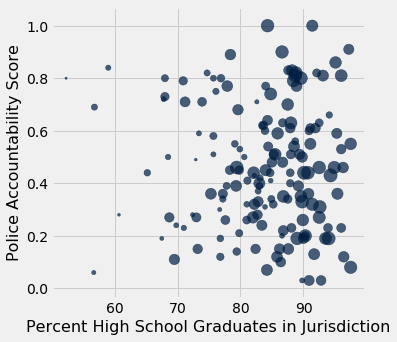

In [28]:
nw = all.column('Pct Non-white')*100
w = all.column('White Percent of Population')*200
b = all.column('Black Percent of Population')*300
h = all.column('Pct Hispanic')*200
bh = b + h

mi = all.column('Median Income')
pvs = all.column('Police Violence Score')

all.scatter('Median Income', 'Police Violence Score', width = 8, height = 3)#, s = nw)
plt.xticks(rotation=90)
plt.xlabel('Median Income ($)')

all.scatter('Median Income', 'Police Violence Score', width = 8, height = 3, s = h)
plt.xticks(rotation=90)
plt.xlabel('Median Income ($)')

all.scatter('Percent High School Graduates in Jurisdiction', 'Police Accountability Score')#, s=w)#, sizes='Pct White')
all.scatter('Percent High School Graduates in Jurisdiction', 'Police Accountability Score', s=w)#, sizes='Pct White')


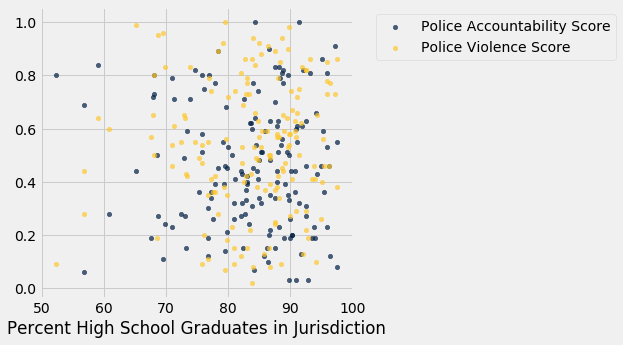

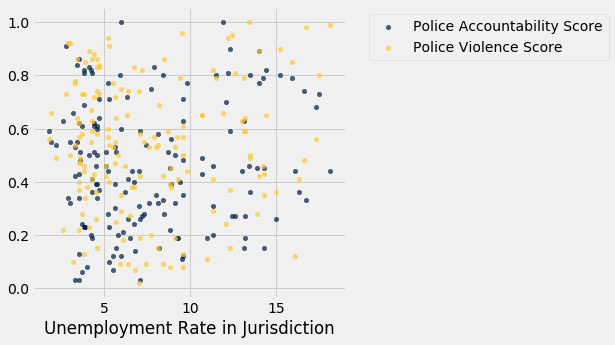

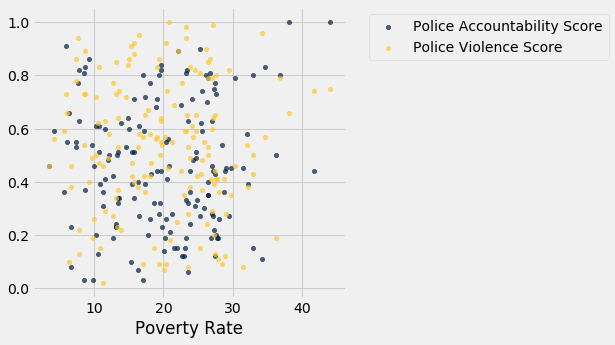

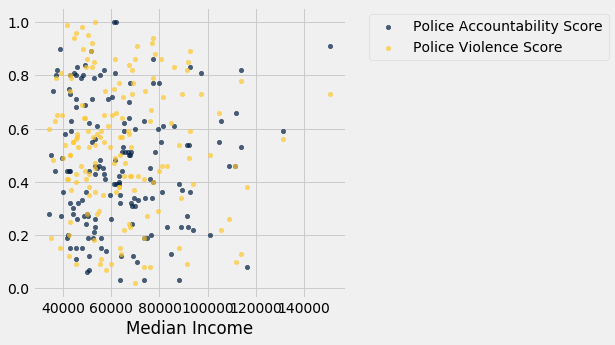

In [29]:
all.scatter('Percent High School Graduates in Jurisdiction', select = ('Police Accountability Score', 'Police Violence Score')) #'Approach to Policing Score'))
all.scatter('Unemployment Rate in Jurisdiction', select = ('Police Accountability Score', 'Police Violence Score')) #'Approach to Policing Score'))
all.scatter('Poverty Rate', select = ('Police Accountability Score', 'Police Violence Score')) #'Approach to Policing Score'))
all.scatter('Median Income', select = ('Police Accountability Score', 'Police Violence Score')) #'Approach to Policing Score'))

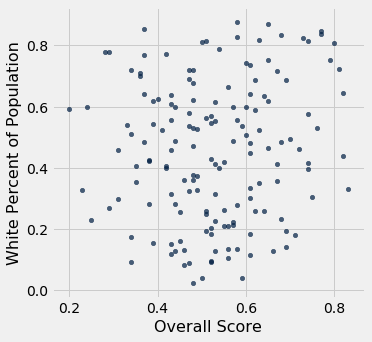

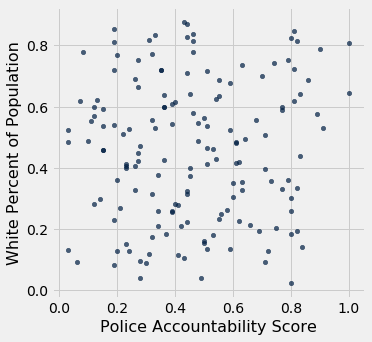

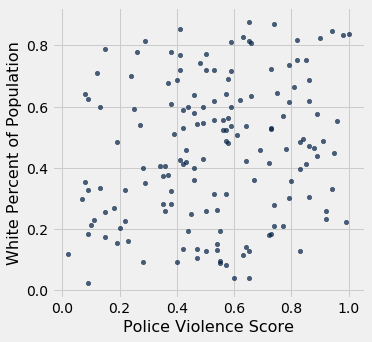

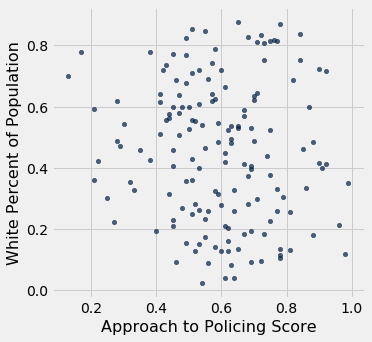

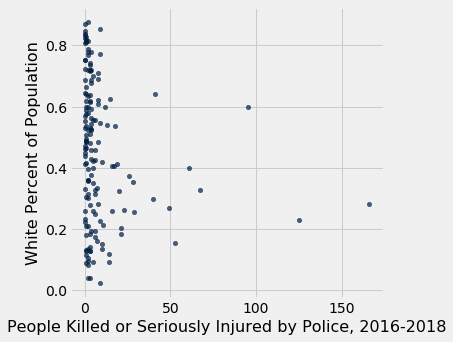

In [30]:
all.scatter('Overall Score', 'White Percent of Population')
all.scatter('Police Accountability Score', 'White Percent of Population')
all.scatter('Police Violence Score', 'White Percent of Population')
all.scatter('Approach to Policing Score', 'White Percent of Population')
all.scatter('People Killed or Seriously Injured by Police, 2016-2018', 'White Percent of Population')

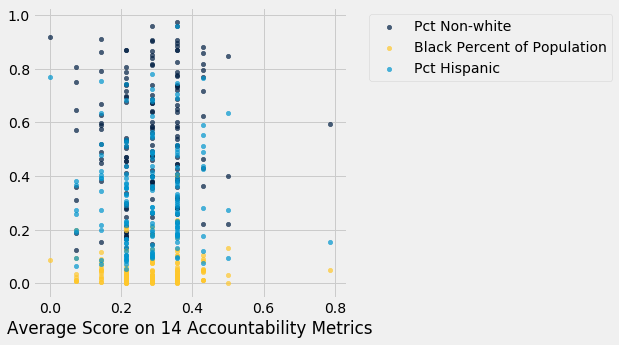

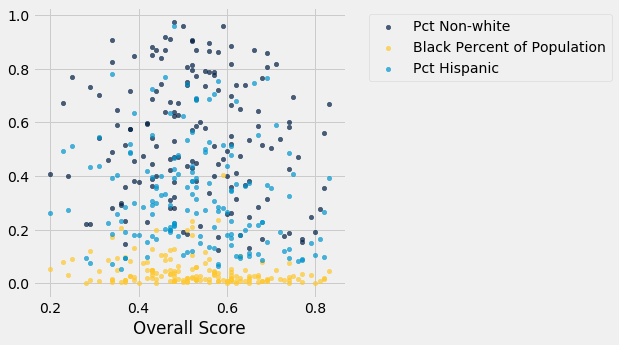

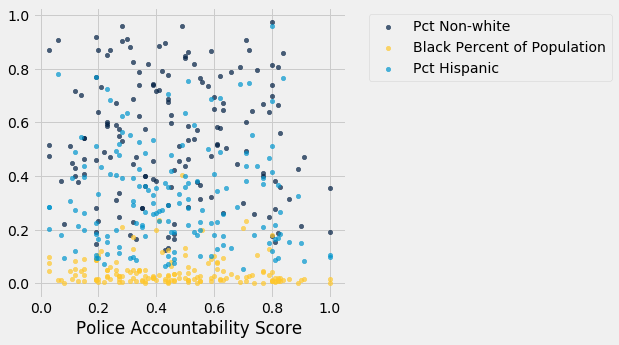

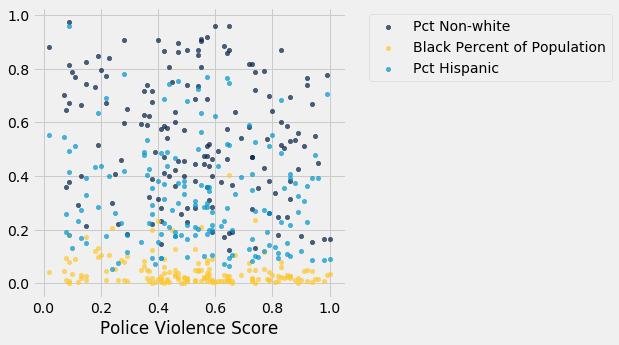

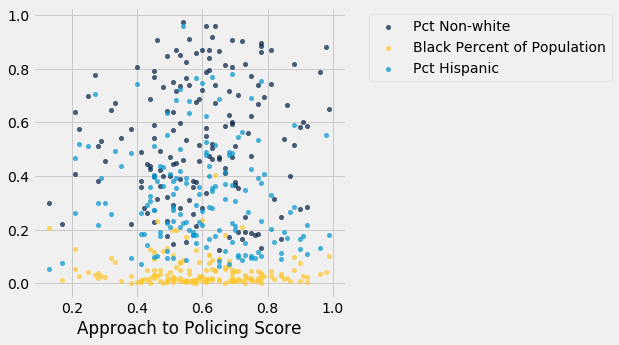

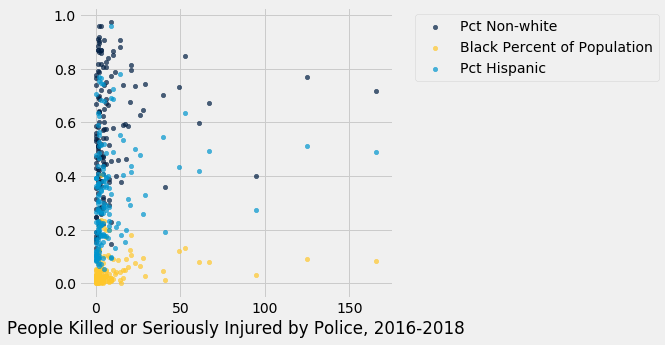

In [31]:
all.scatter('Average Score on 14 Accountability Metrics', select = ('Pct Non-white', 'Black Percent of Population', 'Pct Hispanic'))
all.scatter('Overall Score', select = ('Pct Non-white', 'Black Percent of Population', 'Pct Hispanic'))
all.scatter('Police Accountability Score', select = ('Pct Non-white', 'Black Percent of Population', 'Pct Hispanic'))
all.scatter('Police Violence Score', select = ('Pct Non-white', 'Black Percent of Population', 'Pct Hispanic'))
all.scatter('Approach to Policing Score', select = ('Pct Non-white', 'Black Percent of Population', 'Pct Hispanic'))
all.scatter('People Killed or Seriously Injured by Police, 2016-2018', 
            select = ('Pct Non-white', 'Black Percent of Population', 'Pct Hispanic'))


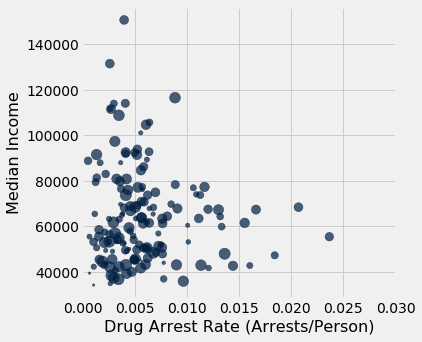

In [32]:
w = all.column('White Percent of Population')*150
all.scatter('Drug Arrest Rate (Arrests/Person)', 'Median Income', s = w)
plt.xlim(0, 0.03);

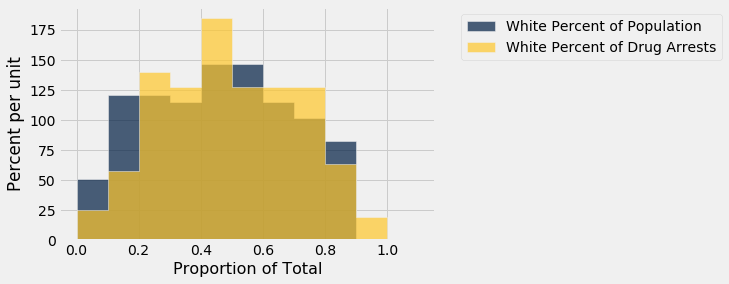

In [33]:
all.hist('White Percent of Population', 'White Percent of Drug Arrests', bins=np.arange(0, 1.2, 0.1))
plt.xlabel('Proportion of Total');

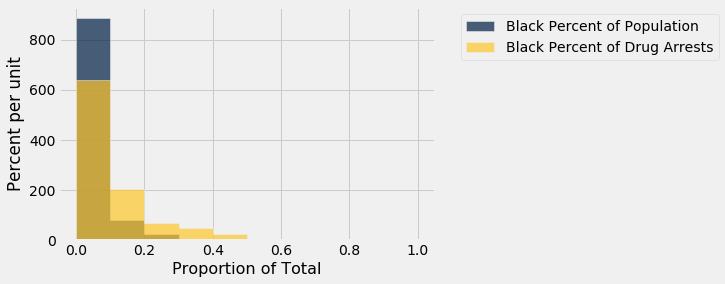

In [34]:
all.hist('Black Percent of Population', 'Black Percent of Drug Arrests', bins=np.arange(0, 1.1, 0.1))
plt.xlabel('Proportion of Total');

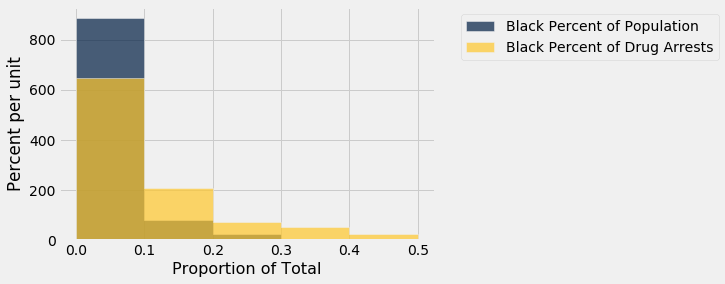

In [35]:
all.hist('Black Percent of Population', 'Black Percent of Drug Arrests', bins=np.arange(0, 0.6, 0.1))
plt.xlabel('Proportion of Total');

Text(0.5, 0, 'Proportion of Total')

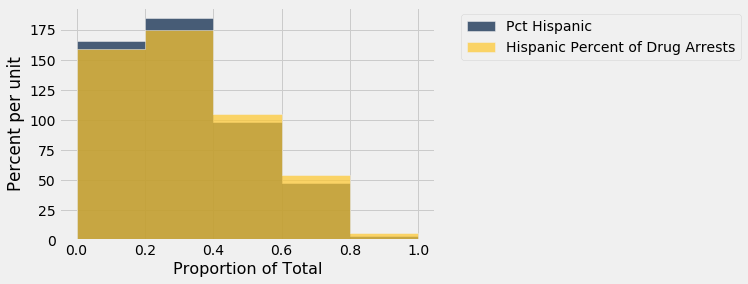

In [36]:
all.hist('Pct Hispanic', 'Hispanic Percent of Drug Arrests', bins=np.arange(0, 1.2, 0.2))
plt.xlabel('Proportion of Total')

In [37]:
regions = all.group('Region', np.mean).select('Region', 'Black Percent of Population mean', 'Black Percent of Drug Arrests mean')
regions

Region,Black Percent of Population mean,Black Percent of Drug Arrests mean
Central,0.0584017,0.0919402
Northern,0.0411698,0.118301
Southern,0.0464419,0.103718


In [38]:
regions.with_column('Percent Difference', (regions.column(2)-regions.column(1))/regions.column(1))

Region,Black Percent of Population mean,Black Percent of Drug Arrests mean,Percent Difference
Central,0.0584017,0.0919402,0.574271
Northern,0.0411698,0.118301,1.87348
Southern,0.0464419,0.103718,1.23329


In [39]:
0.118301/0.0411698

2.873489791060438

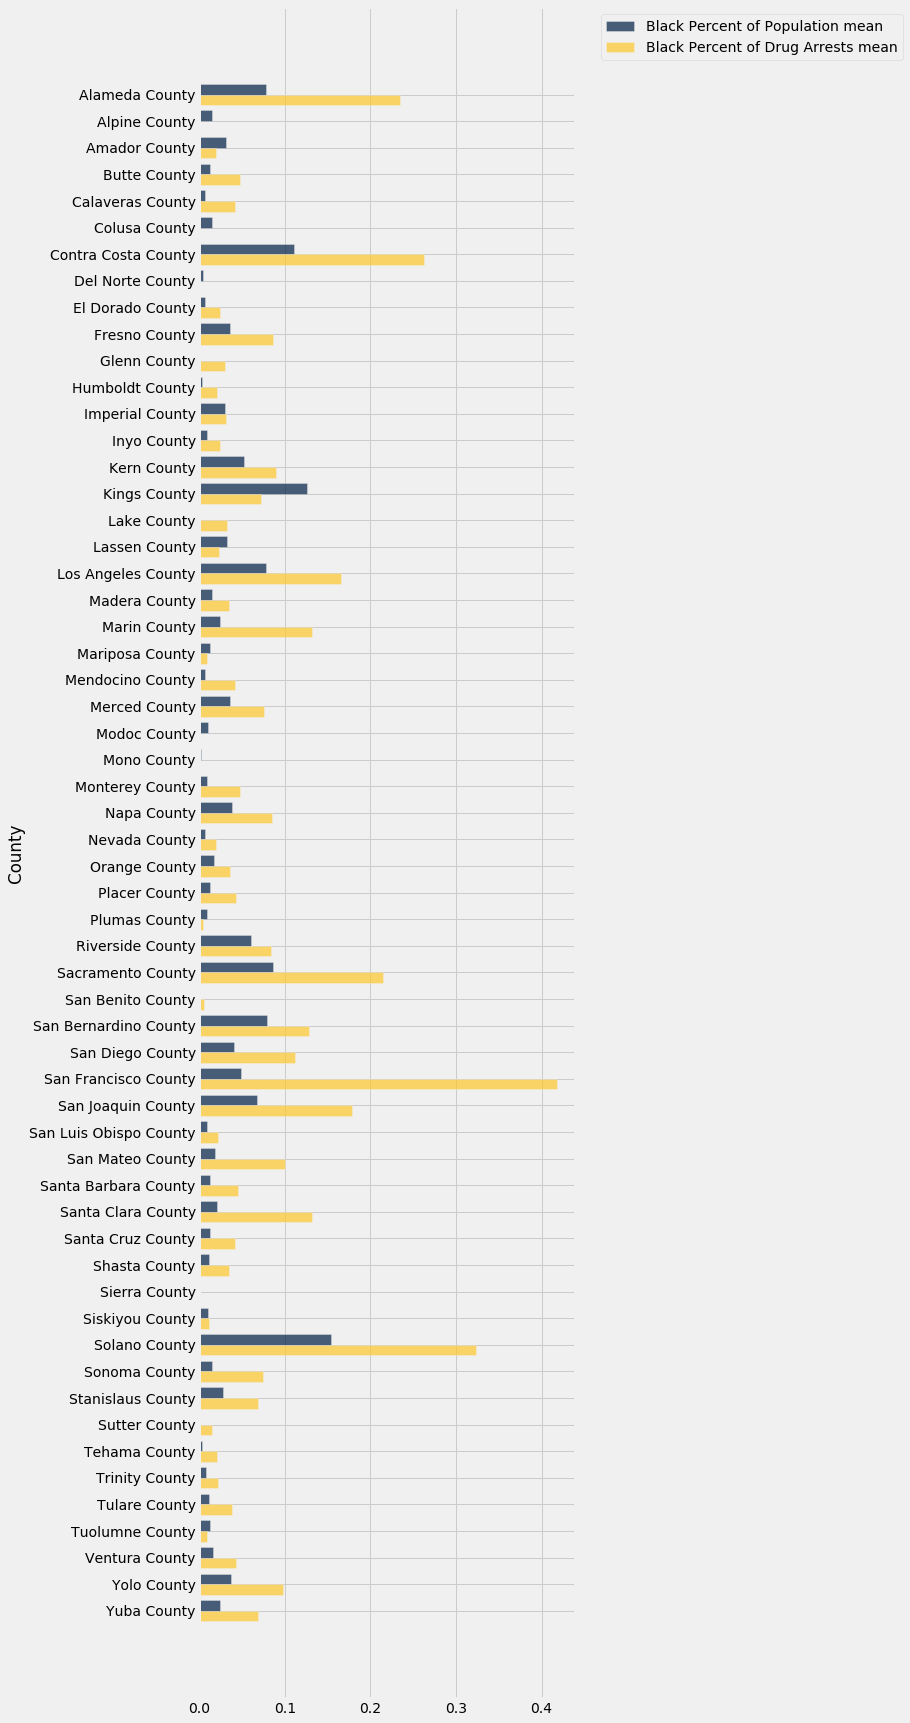

In [40]:
all.group('County', np.mean).barh('County', select=('Black Percent of Population mean', 'Black Percent of Drug Arrests mean'))